# Import libraries and add both datasets that are being used

In [1]:
## Import the required libraries
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import datetime
from datetime import datetime 
import sys
# seaborn is imported for data visualisation.
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.model_selection import train_test_split


In [2]:
## Import the data 
# display_data = pd.read_csv('HTW_docs/3_Case_Study_Condition_Based_Maintenance/data_Vyncke/Data_WTE.csv')
display_data = pd.read_csv('Data_Share/Data_WTE.csv')
# energy_prices = pd.read_csv('HTW_docs/Project/Data_Share/combined_energy_prices.csv')
energy_prices = pd.read_csv('Data_Share/combined_energy_prices.csv')

# Tidy the data - Work on both datasets
### dataset
Tidy data, remove empty variables, rename elements etc.  
Rename the variable Unnamed to date_time and remove the variable 
<br>Set date_time as the index to display_data and rename as data. 

In [3]:
# print(display_data.isnull().sum().sum()) # prior to cleaning initially 243800 of null values within the dataset
# print(display_data.isna().sum().sum()) both returned the same 243800 of null


## display_data. types # lookinges prior to making an amendment at the data type.  
# Unamed: 0 is the time and date. Rename as Date_Time, latet set as date time and set as the index.
display_data = display_data.rename(columns={"Unnamed: 0": "Date_Time"})
count_nan = display_data.isna().sum().sum()

## Rows which contain missing values are removed - data is dropped by over 1,000 (From 525653 down to 473605)
display_data = display_data.drop_duplicates(subset='Date_Time', keep=False)
# display_data = display_data.isna()
display_data = display_data.dropna() # drop rows containing nan values

display_data['Date_Time'] = display_data['Date_Time'].apply(pd.to_datetime)
# display_data['date_time'] = display_data['Date_Time'].apply(pd.to_datetime)
## count_nan # recountign after the dropna() function was used to see the number of missing/empty cells
print ('Count of NaN: ' + str(count_nan))


# display_data = display_data.drop_duplicates(subset='Date_Time', keep=False)
display_data.columns = ['Date_Time', 'HYA10DT107', 'HAH10CT550', 'HAD10CT549', 'HNA10CT551',
               'HAD10CP535', 'LBA10CT546', 'HCB10AA111', 'HLA10CF920', 'HCB10DP534']
display_data


Count of NaN: 243800


,Date_Time,HYA10DT107,HAH10CT550,HAD10CT549,HNA10CT551,HAD10CP535,LBA10CT546,HCB10AA111,HLA10CF920,HCB10DP534
0,2022-01-01 00:00:00,771.282776,482.541199,328.940094,225.565659,42.006115,406.203857,False,22611.878906,0.034722
1,2022-01-01 00:01:00,764.699646,479.932587,328.383545,226.144592,41.990452,404.294220,False,22730.658203,0.034722
2,2022-01-01 00:02:00,763.818176,477.442352,328.381042,226.723526,41.974785,402.192810,False,21774.263672,0.034722
3,2022-01-01 00:03:00,766.534485,478.810669,328.521057,226.906769,41.959118,402.651550,False,20913.945312,0.034722
4,2022-01-01 00:04:00,769.787903,480.179016,328.661041,226.736908,41.943455,403.764618,False,20137.824219,0.034722
...,...,...,...,...,...,...,...,...,...,...
525648,2022-12-31 23:56:00,739.479248,418.763458,291.129120,202.745834,41.662819,405.819092,False,12930.508789,0.034710
525649,2022-12-31 23:57:00,739.514282,418.388000,291.171875,202.684402,41.659737,404.085968,False,12901.798828,0.034673
525650,2022-12-31 23:58:00,739.549377,418.012512,291.214630,202.622986,41.656651,402.596527,False,12640.320312,0.034636
525651,2022-12-31 23:59:00,739.584473,417.637024,291.257416,202.561554,41.653564,403.712036,False,12599.686523,0.034600


In [4]:
# Create a backup of the display_data for later as it is  unable to process the data with the Date_Time index
d_data = display_data
d_data

,Date_Time,HYA10DT107,HAH10CT550,HAD10CT549,HNA10CT551,HAD10CP535,LBA10CT546,HCB10AA111,HLA10CF920,HCB10DP534
0,2022-01-01 00:00:00,771.282776,482.541199,328.940094,225.565659,42.006115,406.203857,False,22611.878906,0.034722
1,2022-01-01 00:01:00,764.699646,479.932587,328.383545,226.144592,41.990452,404.294220,False,22730.658203,0.034722
2,2022-01-01 00:02:00,763.818176,477.442352,328.381042,226.723526,41.974785,402.192810,False,21774.263672,0.034722
3,2022-01-01 00:03:00,766.534485,478.810669,328.521057,226.906769,41.959118,402.651550,False,20913.945312,0.034722
4,2022-01-01 00:04:00,769.787903,480.179016,328.661041,226.736908,41.943455,403.764618,False,20137.824219,0.034722
...,...,...,...,...,...,...,...,...,...,...
525648,2022-12-31 23:56:00,739.479248,418.763458,291.129120,202.745834,41.662819,405.819092,False,12930.508789,0.034710
525649,2022-12-31 23:57:00,739.514282,418.388000,291.171875,202.684402,41.659737,404.085968,False,12901.798828,0.034673
525650,2022-12-31 23:58:00,739.549377,418.012512,291.214630,202.622986,41.656651,402.596527,False,12640.320312,0.034636
525651,2022-12-31 23:59:00,739.584473,417.637024,291.257416,202.561554,41.653564,403.712036,False,12599.686523,0.034600


In [5]:
# Set the date_Time as the index of the data 
display_data = display_data.set_index(['Date_Time']) # can only run once otherwise will return an error
# create a backup of the display_data
data = display_data
# Create a backup data set of data
data_back_Up = data


### Tidy - Electricity cost data
Get the average of the price as there are two variables
<br> Create a new variable called €_per_day for the calculated mean.
<br>Make the Date and time as datetime and set as index

In [6]:
#energy_prices.nunique() # datetime - 8759 #price1 - 5293 #price2 - 5331
# just looking at random energy prices and checking both the energy prices
# energy_prices[7503:7529]
####### energy_prices = pd.read_csv('Data_Share/combined_energy_prices.csv')

# Calculate the average of both the energy prices
energy_prices['€_per_day'] = energy_prices[['price1', 'price2']].mean(axis=1)

# rename the column datetime to Date_Time & then set it as datetime data type
energy_prices = energy_prices.rename(columns={"datetime": "Date_Time"})
energy_prices['Date_Time'] = energy_prices['Date_Time'].apply(pd.to_datetime) 

# drop price 1 and price_2 because €_per_day is now the average.
energy_prices = energy_prices[['Date_Time', '€_per_day']]
# energy_prices = energy_prices.sort_values(by=['Date_Time'], ascending=True, inplace=True)

# Set the Date_Time variable as the index of this dataset to merge them both on this next
energy_prices = energy_prices.set_index(['Date_Time'])
# energy_prices

### Merge both the data and the energy cost into the same dataset call it 'all_data'

In [7]:
# This needs to be carried out first in order to merge both the data sets
display_data = display_data.sort_index()
energy_prices = energy_prices.sort_index()

In [8]:
# # # Merge the minute-level data with the hourly prices, using asof merge
# all_data = pd.merge_asof(display_data, energy_prices, on='Date_Time', direction='backward')
# stopped working 02 October 2024 - 
all_data = pd.merge_asof(display_data, energy_prices, left_index=True, right_index=True, direction='backward')
# # merged_df = pd.merge_asof(df_minute, df_hourly, left_index=True, right_index=True, direction='backward')

# needs to be fixed because new_filtered_data has not yet been defined
# all_data
# # Now reorder the data into:
all_data = all_data [['HAH10CT550', 'HNA10CT551', 'HAD10CT549', 'HYA10DT107',
                            'HAD10CP535', 'LBA10CT546', 
                            'HLA10CF920','HCB10DP534', 'HCB10AA111', '€_per_day']]
# all_data

## Initially visualise all the data. The WHOLE TIME FRAME - aka 1 year
<br>Ten variables individually graphed. 
<br>Then all the variables on the same.</br> 


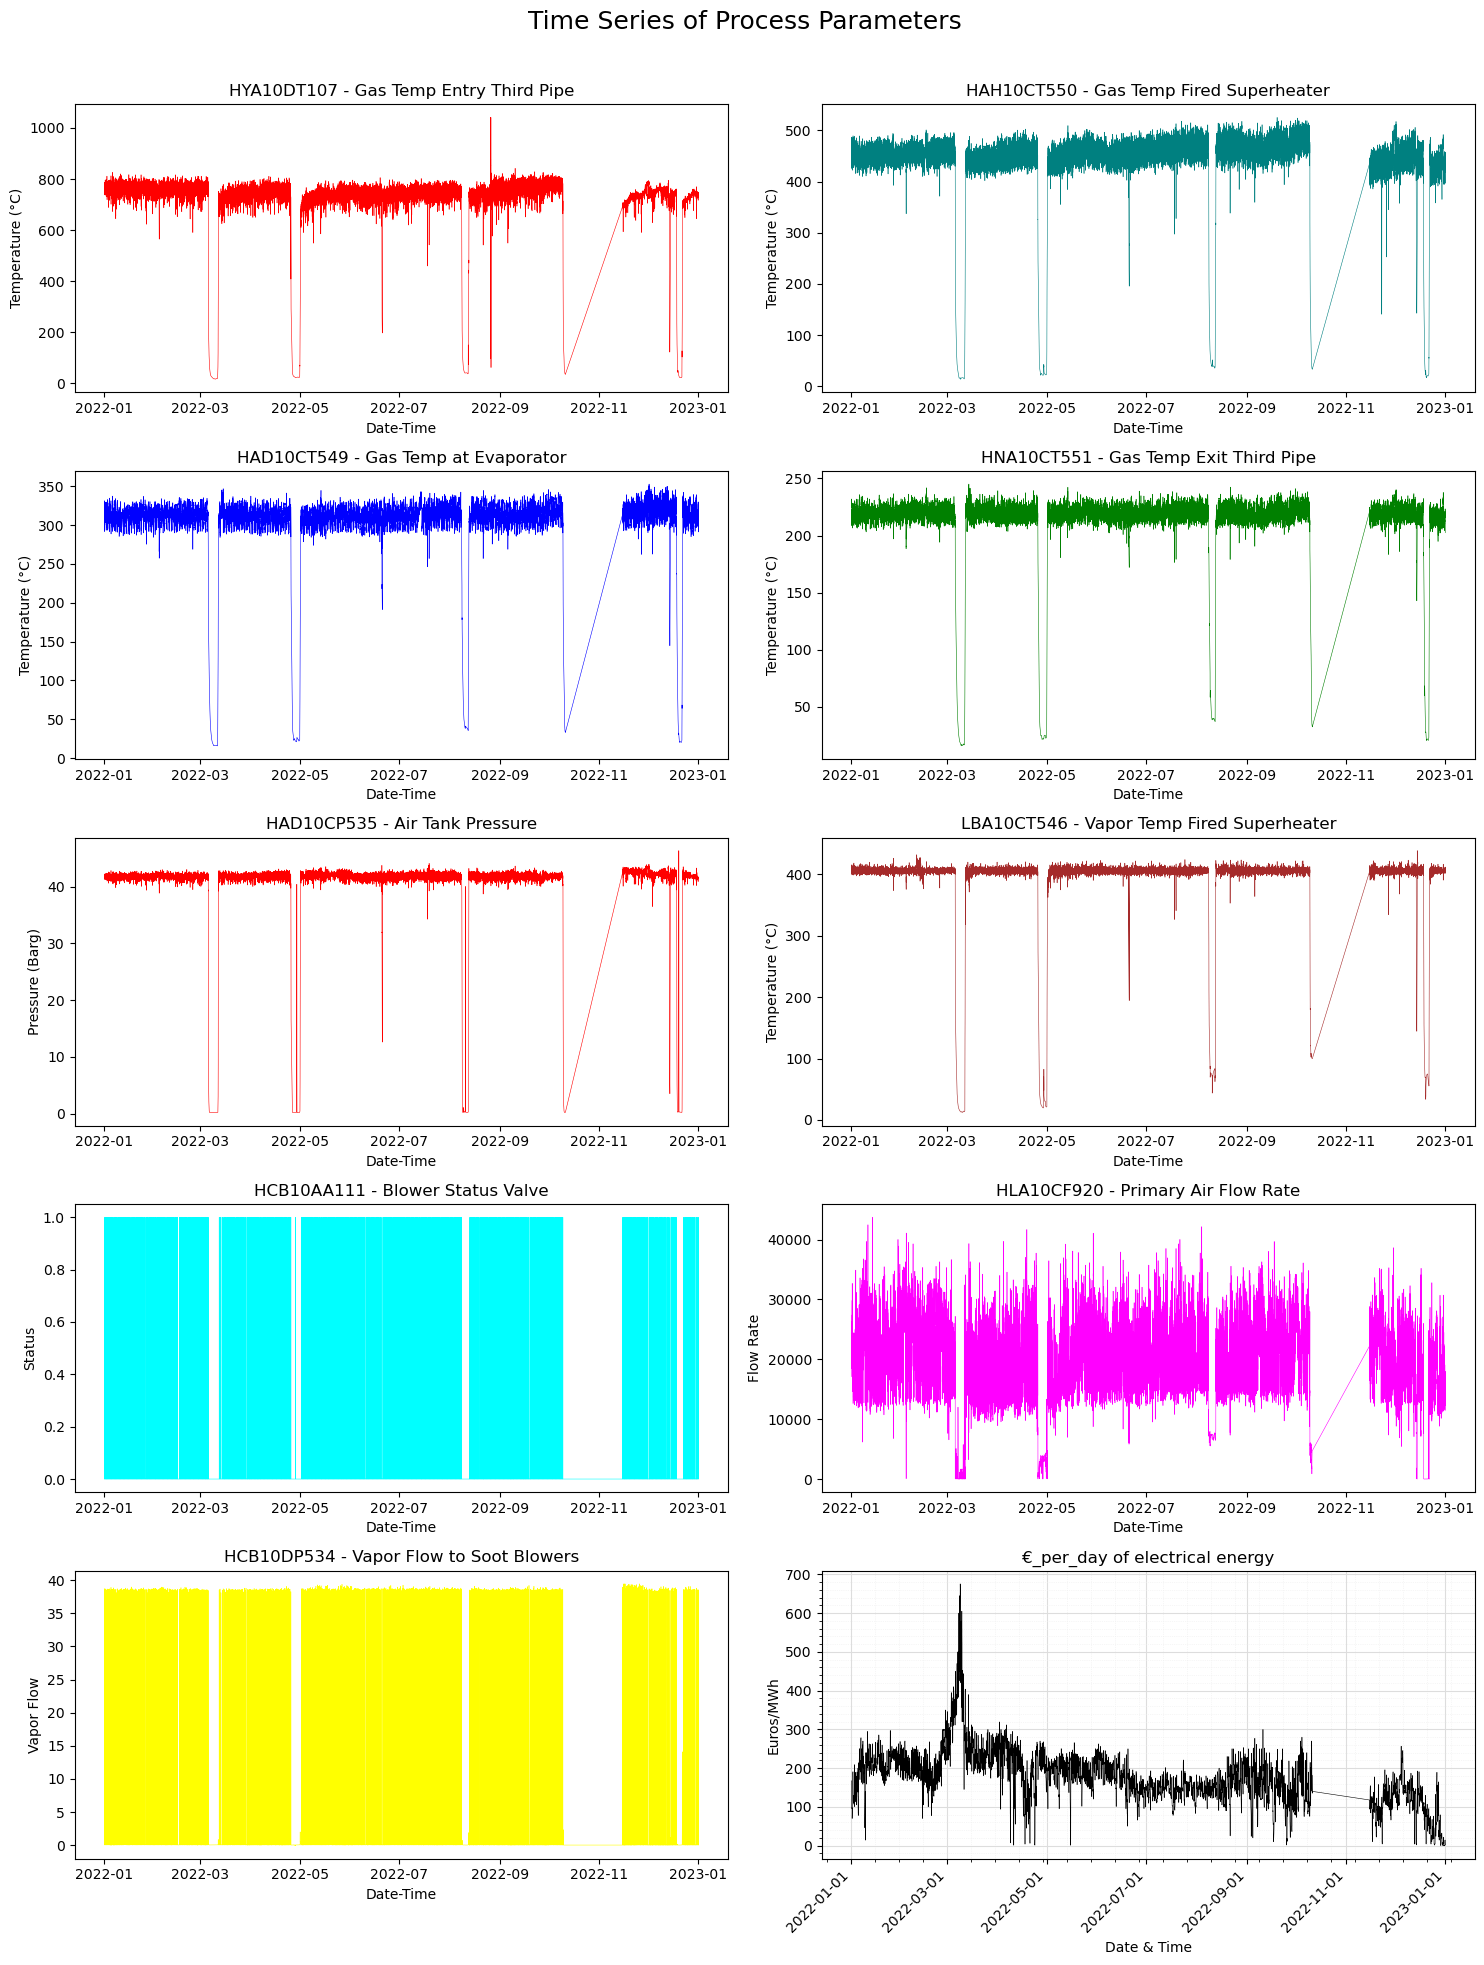

In [9]:
# Set up a figure for the subplots
fig, axs = plt.subplots(5, 2, figsize=(15, 20))
fig.suptitle('Time Series of Process Parameters', fontsize=18)

# 1st subplot: HYA10DT107 Gas phase temperature at the entry of the third pipe sector
axs[0, 0].plot(all_data['HYA10DT107'], color='red',linewidth=0.4)
axs[0, 0].set_title('HYA10DT107 - Gas Temp Entry Third Pipe')
axs[0, 0].set_xlabel('Date-Time')
axs[0, 0].set_ylabel('Temperature (°C)')

# 2nd subplot: HAH10CT550 Gas phase temperature at the fired steam superheater
axs[0, 1].plot(all_data['HAH10CT550'], color='teal', linewidth=0.4)
axs[0, 1].set_title('HAH10CT550 - Gas Temp Fired Superheater')
axs[0, 1].set_xlabel('Date-Time')
axs[0, 1].set_ylabel('Temperature (°C)')

# 3rd subplot: HAD10CT549 Gas phase temperature at the evaporator
axs[1, 0].plot(all_data['HAD10CT549'], color='blue', linewidth=0.4)
axs[1, 0].set_title('HAD10CT549 - Gas Temp at Evaporator')
axs[1, 0].set_xlabel('Date-Time')
axs[1, 0].set_ylabel('Temperature (°C)')

# 4th subplot: HNA10CT551 Gas phase temperature at the exit of the third pipe sector
axs[1, 1].plot(all_data['HNA10CT551'], color='green', linewidth=0.4)
axs[1, 1].set_title('HNA10CT551 - Gas Temp Exit Third Pipe')
axs[1, 1].set_xlabel('Date-Time')
axs[1, 1].set_ylabel('Temperature (°C)')

# 5th subplot: HAD10CP535 System air tank pressure – Maintenance when lower than 39 Barg
axs[2, 0].plot(all_data['HAD10CP535'], color='red', linewidth=0.4)
axs[2, 0].set_title('HAD10CP535 - Air Tank Pressure')
axs[2, 0].set_xlabel('Date-Time')
axs[2, 0].set_ylabel('Pressure (Barg)')

# 6th subplot: LBA10CT546 Vapor phase temperature at the fired steam superheater
axs[2, 1].plot(all_data['LBA10CT546'], color='brown', linewidth=0.4)
axs[2, 1].set_title('LBA10CT546 - Vapor Temp Fired Superheater')
axs[2, 1].set_xlabel('Date-Time')
axs[2, 1].set_ylabel('Temperature (°C)')

# 7th subplot: HCB10AA111 Blower status indicator valve
axs[3, 0].plot(all_data['HCB10AA111'], color='cyan', linewidth=0.4)
axs[3, 0].set_title('HCB10AA111 - Blower Status Valve')
axs[3, 0].set_xlabel('Date-Time')
axs[3, 0].set_ylabel('Status')

# 8th subplot: HLA10CF920 Primary air flow rate
axs[3, 1].plot(all_data['HLA10CF920'], color='magenta', linewidth=0.4)
axs[3, 1].set_title('HLA10CF920 - Primary Air Flow Rate')
axs[3, 1].set_xlabel('Date-Time')
axs[3, 1].set_ylabel('Flow Rate')

# 9th subplot: HCB10DP534 Vapor flow to soot blowers – Indicates when soot blowing is being performed
axs[4, 0].plot(all_data['HCB10DP534'], color='yellow', linewidth=0.4)
axs[4, 0].set_title('HCB10DP534 - Vapor Flow to Soot Blowers')
axs[4, 0].set_xlabel('Date-Time')
axs[4, 0].set_ylabel('Vapor Flow')

# 10th subplot: Price 
axs[4, 1].plot(all_data['€_per_day'], color='black', linewidth=0.4)
axs[4, 1].set_title('€_per_day of electrical energy')
axs[4, 1].set_xlabel('Time')
axs[4, 1].set_ylabel('Euros/MWh')

# add grid lines 
plt.grid(which='major', color='#DDDDDD', linewidth=0.8)  # Show the minor grid as well. Style it in very light grey as a thin, # dotted line.
plt.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
# Make the minor ticks and gridlines show.
plt.minorticks_on()

# Format x-axis (for date data)
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())  # Auto locate major date ticks
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format the date as 'Year-Month-Day'
# plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=14))  # Set major ticks (daily, can adjust interval)
# plt.gca().xaxis.set_minor_locator(mdates.HourLocator(interval=24))  # Set minor ticks every 6 hours

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels to avoid overlap
plt.xlabel('Date & Time')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

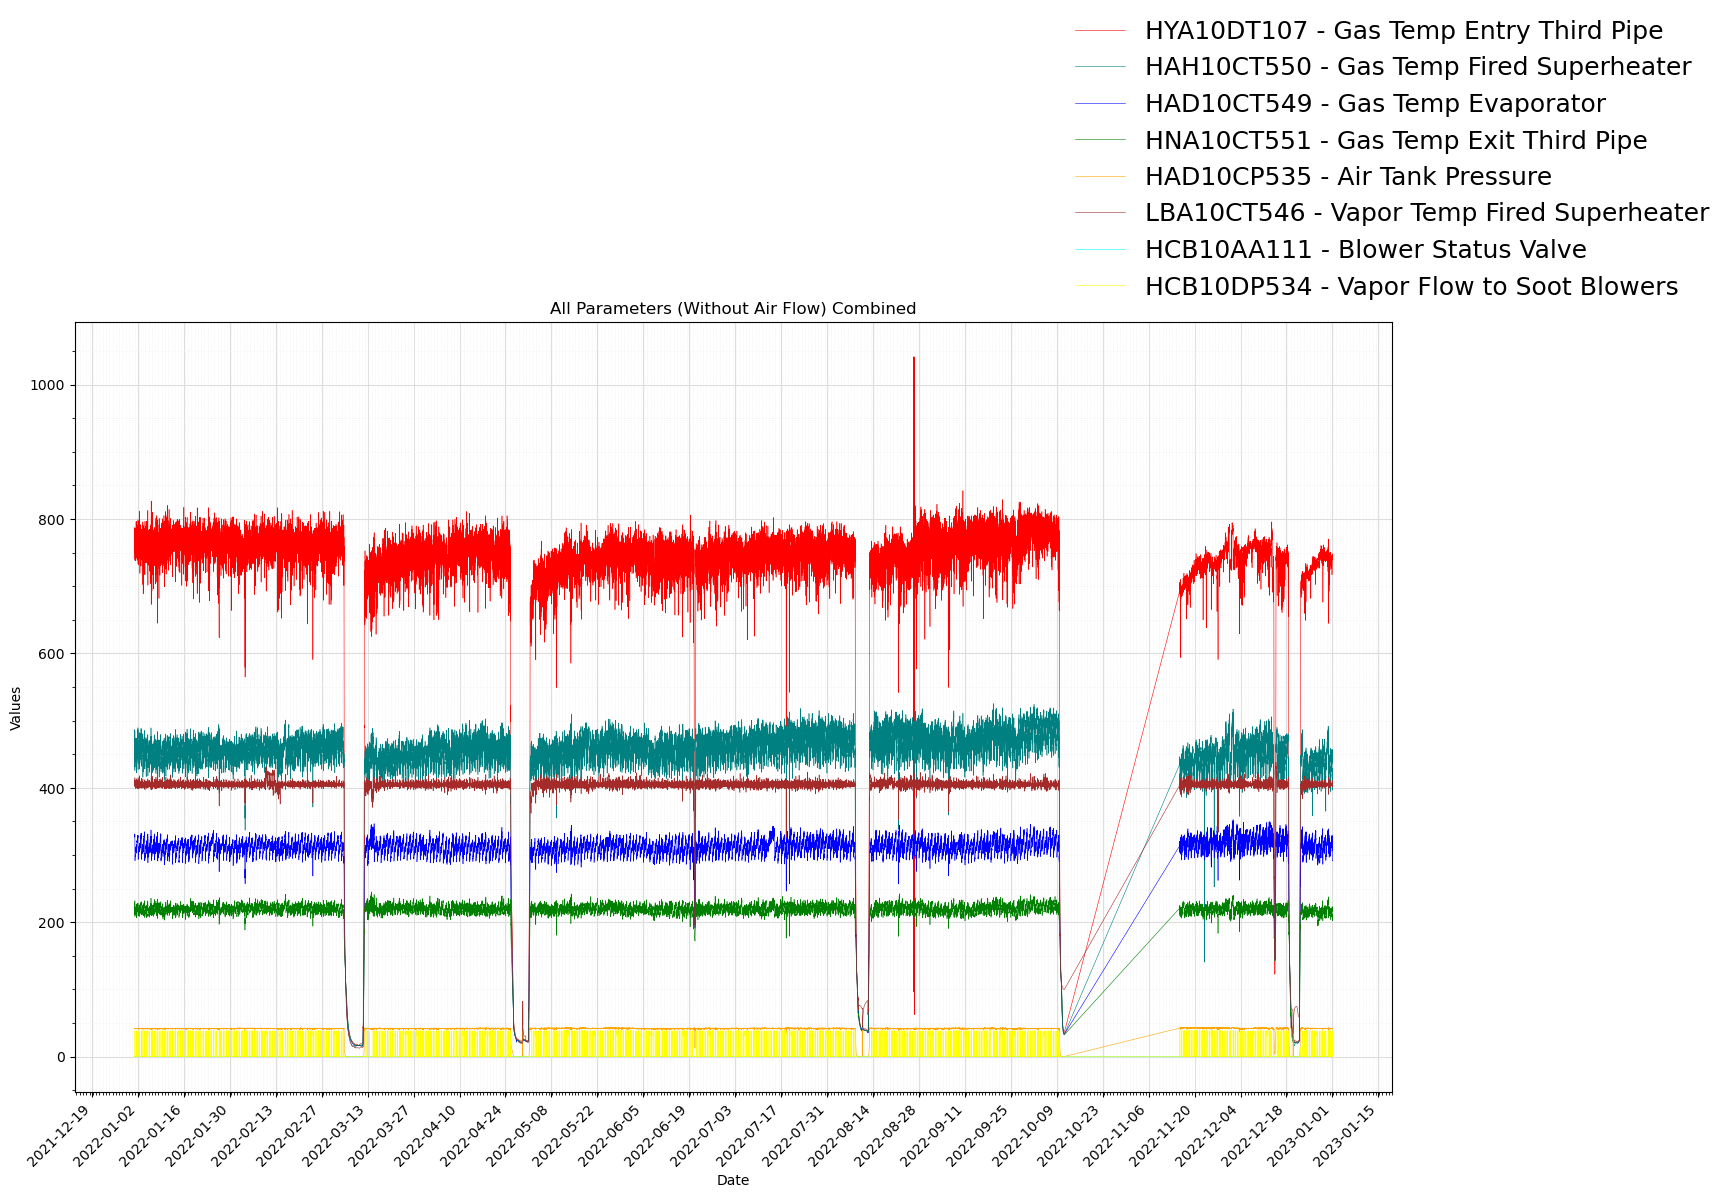

In [10]:
# Visualising all the parameters
# For better readability comment out the price graph
plt.figure(figsize=(17, 10))

plt.plot(all_data['HYA10DT107'], label='HYA10DT107 - Gas Temp Entry Third Pipe', color='red', linewidth=0.4)
plt.plot(all_data['HAH10CT550'], label='HAH10CT550 - Gas Temp Fired Superheater', color='teal', linewidth=0.4)
plt.plot(all_data['HAD10CT549'], label='HAD10CT549 - Gas Temp Evaporator', color='blue', linewidth=0.4)
plt.plot(all_data['HNA10CT551'], label='HNA10CT551 - Gas Temp Exit Third Pipe', color='green', linewidth=0.4)
plt.plot(all_data['HAD10CP535'], label='HAD10CP535 - Air Tank Pressure', color='orange', linewidth=0.4)
plt.plot(all_data['LBA10CT546'], label='LBA10CT546 - Vapor Temp Fired Superheater', color='brown', linewidth=0.4)
plt.plot(all_data['HCB10AA111'], label='HCB10AA111 - Blower Status Valve', color='cyan', linewidth=0.4)
#plt.plot(all_data['HLA10CF920'], label='HLA10CF920 - Primary Air Flow Rate', color='magenta')
plt.plot(all_data['HCB10DP534'], label='HCB10DP534 - Vapor Flow to Soot Blowers', color='yellow', linewidth=0.4)

# add grid lines 
plt.grid(which='major', color='#DDDDDD', linewidth=0.8)  # Show the minor grid as well. Style it in very light grey as a thin, # dotted line.
plt.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
# Make the minor ticks and gridlines show.
plt.minorticks_on()

# Format x-axis (for date data)
# plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())  # Auto locate major date ticks
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format the date as 'Year-Month-Day'
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=14))  # Set major ticks (daily, can adjust interval)
plt.gca().xaxis.set_minor_locator(mdates.HourLocator(interval=24))  # Set minor ticks every 6 hours

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels to avoid overlap
plt.xlabel('Date & Time')


# Add a title to the chart
plt.title('Gas Phase Temperature at Entry of Third pipe, \n Fired Stream Superheater and Evaporator - Time Series Data', fontsize=18)

# Adjust legend position and avoid overlap
plt.legend(loc='lower center', bbox_to_anchor=(1, 1), ncol=1, fontsize=18, frameon=False)

# Tighten the layout to avoid label/title overlap
# plt.tight_layout()

# Labeling and legend
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('All Parameters (Without Air Flow) Combined')
# plt.legend(loc='upper right')
plt.show()

#### Looking at the data, there are 5 major drops within the data.  The drop is shown on the data from 09/10/2022 (October) until approximately the 13th (18th October).  Data from here should be removed as it has been down for such a long time.  The data from 20th October until 01 January 2023 could be looked at. Initally going to look at the first three days - 72-hour time frame

## Visualise the Data over a 3-day period - a 72 hour time period

In [11]:
# Time Series of Process Parameters for 72 Hours

# Define both the start and end date - the first 72 hours are selected
start_date_t = '2022-01-01 00:00:00'
end_date_t = '2022-01-03 23:59:59'

# Filter the data between the start and end dates
#filtered_data = data.loc[start_date_t : end_date_t] # worked initially then KeyError: 'Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is not allowed.'
filtered_data = all_data.loc[(all_data.index.get_level_values(0) >= start_date_t) & (all_data.index.get_level_values(0) <= end_date_t)]

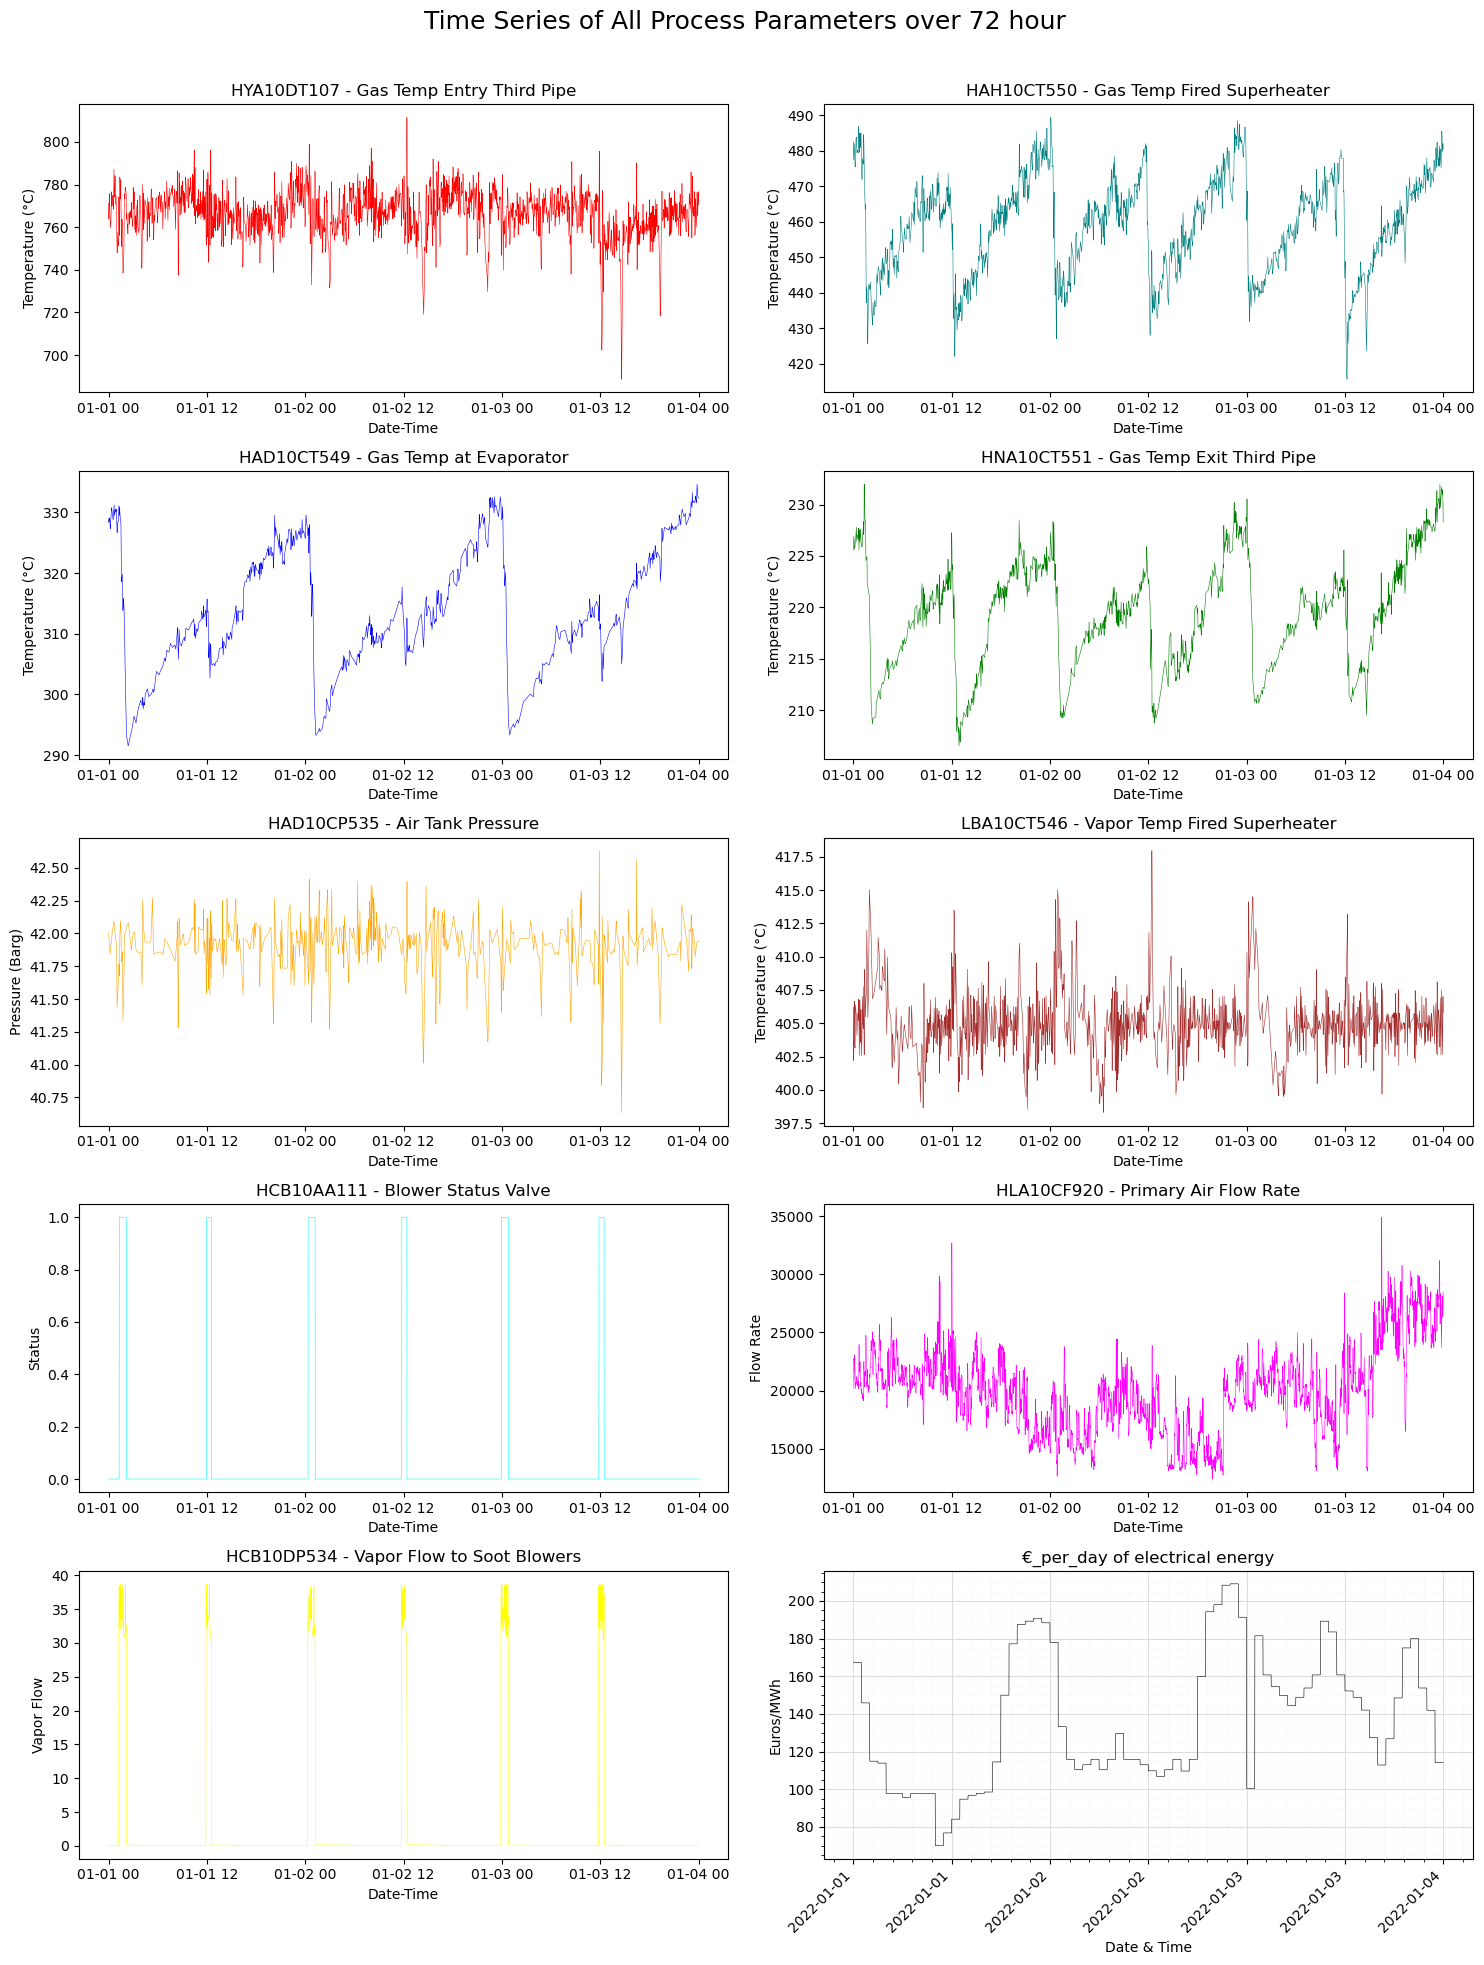

In [12]:
# Set up a figure for the subplots
fig, axs = plt.subplots(5, 2, figsize=(15, 20))
fig.suptitle('Time Series of All Process Parameters over 72 hour', fontsize=18)

# 1st subplot: HYA10DT107 Gas phase temperature at the entry of the third pipe sector
axs[0, 0].plot(filtered_data['HYA10DT107'], color='red',linewidth=0.4)
axs[0, 0].set_title('HYA10DT107 - Gas Temp Entry Third Pipe')
axs[0, 0].set_xlabel('Date-Time')
axs[0, 0].set_ylabel('Temperature (°C)')

# 2nd subplot: HAH10CT550 Gas phase temperature at the fired steam superheater
axs[0, 1].plot(filtered_data['HAH10CT550'], color='teal', linewidth=0.4)
axs[0, 1].set_title('HAH10CT550 - Gas Temp Fired Superheater')
axs[0, 1].set_xlabel('Date-Time')
axs[0, 1].set_ylabel('Temperature (°C)')

# 3rd subplot: HAD10CT549 Gas phase temperature at the evaporator
axs[1, 0].plot(filtered_data['HAD10CT549'], color='blue', linewidth=0.4)
axs[1, 0].set_title('HAD10CT549 - Gas Temp at Evaporator')
axs[1, 0].set_xlabel('Date-Time')
axs[1, 0].set_ylabel('Temperature (°C)')

# 4th subplot: HNA10CT551 Gas phase temperature at the exit of the third pipe sector
axs[1, 1].plot(filtered_data['HNA10CT551'], color='green', linewidth=0.4)
axs[1, 1].set_title('HNA10CT551 - Gas Temp Exit Third Pipe')
axs[1, 1].set_xlabel('Date-Time')
axs[1, 1].set_ylabel('Temperature (°C)')

# 5th subplot: HAD10CP535 System air tank pressure – Maintenance when lower than 39 Barg
axs[2, 0].plot(filtered_data['HAD10CP535'], color='orange', linewidth=0.4)
axs[2, 0].set_title('HAD10CP535 - Air Tank Pressure')
axs[2, 0].set_xlabel('Date-Time')
axs[2, 0].set_ylabel('Pressure (Barg)')

# 6th subplot: LBA10CT546 Vapor phase temperature at the fired steam superheater
axs[2, 1].plot(filtered_data['LBA10CT546'], color='brown', linewidth=0.4)
axs[2, 1].set_title('LBA10CT546 - Vapor Temp Fired Superheater')
axs[2, 1].set_xlabel('Date-Time')
axs[2, 1].set_ylabel('Temperature (°C)')

# 7th subplot: HCB10AA111 Blower status indicator valve
axs[3, 0].plot(filtered_data['HCB10AA111'], color='cyan', linewidth=0.4)
axs[3, 0].set_title('HCB10AA111 - Blower Status Valve')
axs[3, 0].set_xlabel('Date-Time')
axs[3, 0].set_ylabel('Status')

# 8th subplot: HLA10CF920 Primary air flow rate
axs[3, 1].plot(filtered_data['HLA10CF920'], color='magenta', linewidth=0.4)
axs[3, 1].set_title('HLA10CF920 - Primary Air Flow Rate')
axs[3, 1].set_xlabel('Date-Time')
axs[3, 1].set_ylabel('Flow Rate')

# 9th subplot: HCB10DP534 Vapor flow to soot blowers – Indicates when soot blowing is being performed
axs[4, 0].plot(filtered_data['HCB10DP534'], color='yellow', linewidth=0.4)
axs[4, 0].set_title('HCB10DP534 - Vapor Flow to Soot Blowers')
axs[4, 0].set_xlabel('Date-Time')
axs[4, 0].set_ylabel('Vapor Flow')

# 10th subplot
axs[4, 1].plot(filtered_data['€_per_day'], color='black', linewidth=0.4)
axs[4, 1].set_title('€_per_day of electrical energy')
axs[4, 1].set_xlabel('Time')
axs[4, 1].set_ylabel('Euros/MWh')

# add grid lines 
plt.grid(which='major', color='#DDDDDD', linewidth=0.8)  # Show the minor grid as well. Style it in very light grey as a thin, # dotted line.
plt.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
# Make the minor ticks and gridlines show.
plt.minorticks_on()

# Format x-axis (for date data)
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())  # Auto locate major date ticks
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format the date as 'Year-Month-Day'
# plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=14))  # Set major ticks (daily, can adjust interval)
# plt.gca().xaxis.set_minor_locator(mdates.HourLocator(interval=24))  # Set minor ticks every 6 hours

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels to avoid overlap
plt.xlabel('Date & Time')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

Text(0.5, 1.0, 'Correlation Matrix of Parameters in 72 hrs')

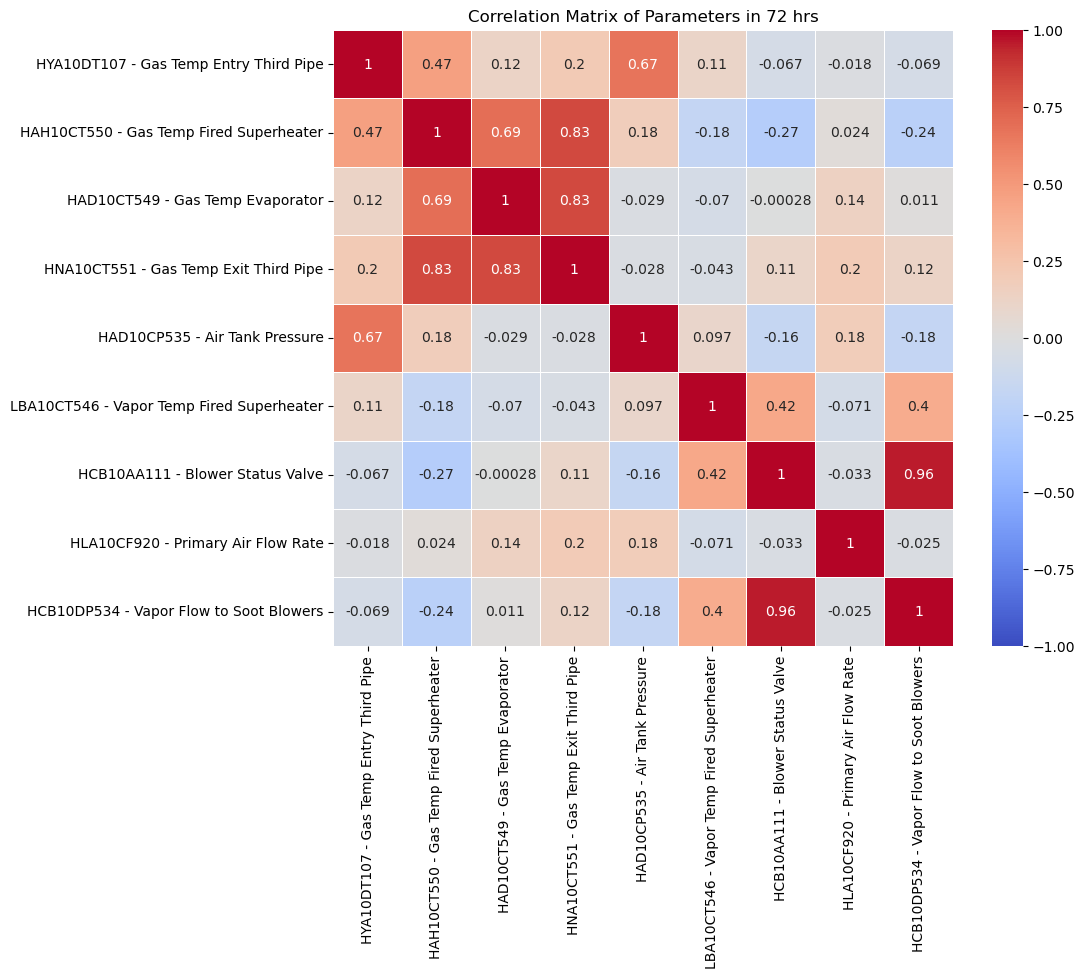

In [13]:
# This is the first version to check the differences start_date_t = '2022-01-01 00:00:00' to the end_date_t = '2022-01-03 23:59:59'
# Define the columns and their descriptive labels
columns_to_correlate = ['HYA10DT107', 'HAH10CT550', 'HAD10CT549', 'HNA10CT551', 
                        'HAD10CP535', 'LBA10CT546', 'HCB10AA111', 'HLA10CF920', 'HCB10DP534'] #, 'price1']

descriptive_labels = [
    'HYA10DT107 - Gas Temp Entry Third Pipe',
    'HAH10CT550 - Gas Temp Fired Superheater',
    'HAD10CT549 - Gas Temp Evaporator',
    'HNA10CT551 - Gas Temp Exit Third Pipe',
    'HAD10CP535 - Air Tank Pressure',
    'LBA10CT546 - Vapor Temp Fired Superheater',
    'HCB10AA111 - Blower Status Valve',
    'HLA10CF920 - Primary Air Flow Rate',
    'HCB10DP534 - Vapor Flow to Soot Blowers' #,
    #'Price of electricity'
]

# Generate the correlation matrix
correlation_matrix = filtered_data[columns_to_correlate].corr()

# Plot the correlation matrix with custom labels
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, 
            xticklabels=descriptive_labels, yticklabels=descriptive_labels, linewidths=0.5)
plt.title('Correlation Matrix of Parameters in 72 hrs')
# plt.show()

This shows that :
HAH10CT550: Gas phase temperature at the fired steam superheater
HAD10CT549: Gas phase temperature at the evaporator
HNA10CT551: Gas phase temperature at the exit of the third pipe sector

## This is focusing on the three elements over the year.  The focus is on the Gas Phase temperature at:
#### 1. Entry of 3rd Pipe Sector, <br> 2.Fired Steam Superheater & <br> 3. Evaporator

Showing the three elements on line chart

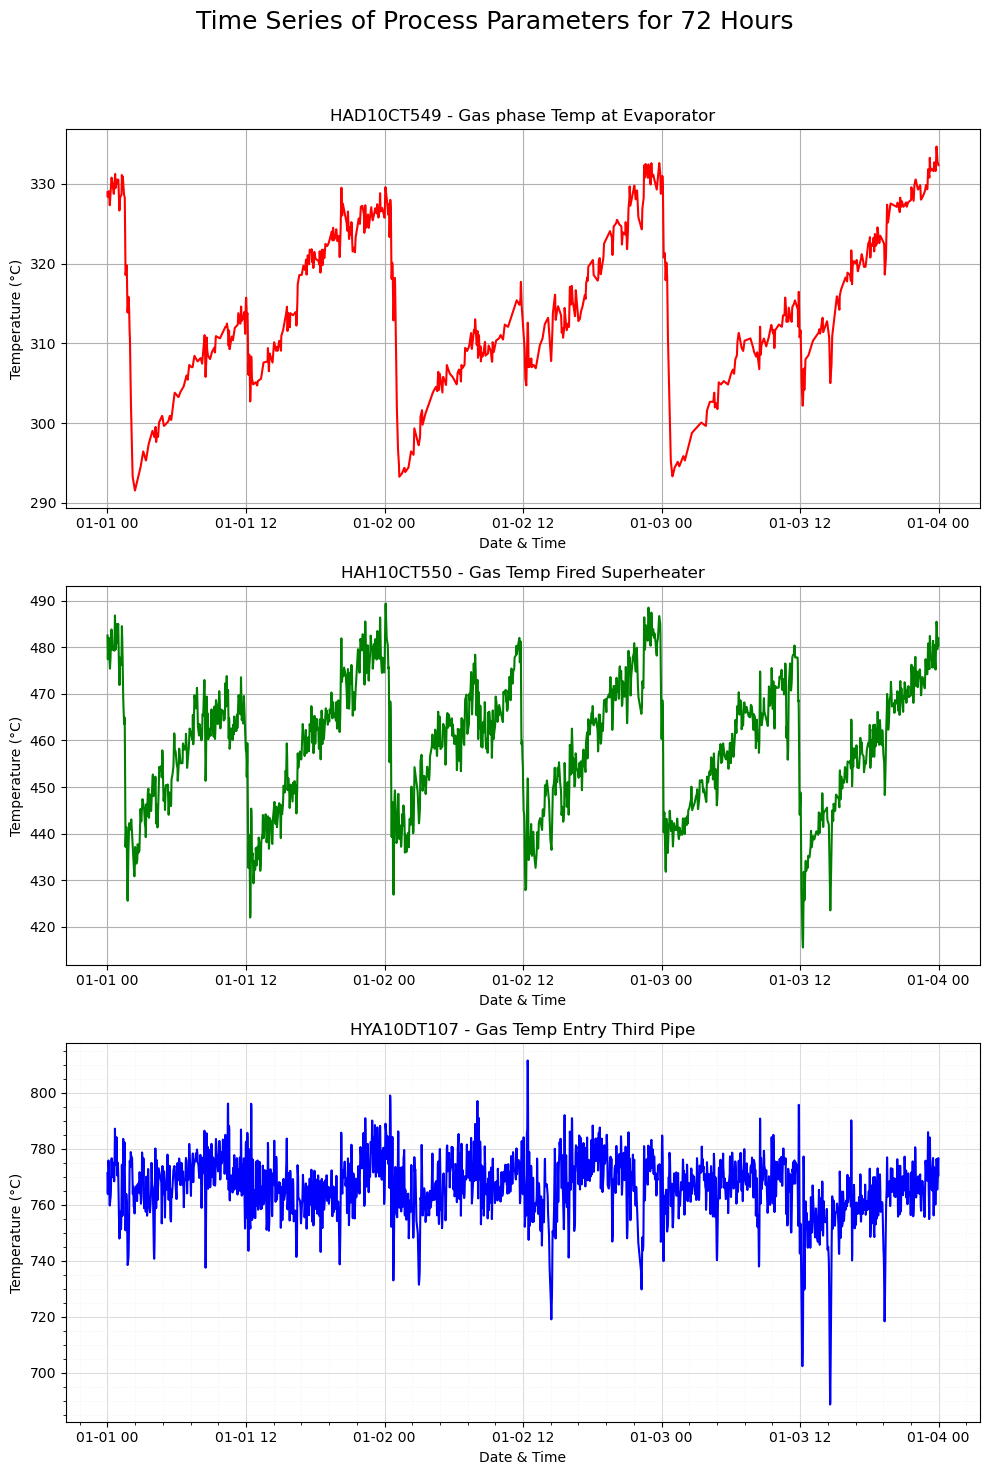

In [14]:

# Showing the three elements 
# create the figure and the subplots - 3 charts vertical
fig, axs = plt.subplots(3, figsize = (10, 15))

# # Set up a figure for the subplots for the filtered data
fig.suptitle('Time Series of Process Parameters for 72 Hours', fontsize=18)

# 1st subplot: HAD10CT549 Gas phase temperature at the evaporator
axs[0].plot(filtered_data['HAD10CT549'], color='red')
axs[0].set_title('HAD10CT549 - Gas phase Temp at Evaporator')
axs[0].set_xlabel('Date & Time')
axs[0].set_ylabel('Temperature (°C)')
axs[0].grid(True)

# 2nd subplot: HAH10CT550 Gas phase temperature at the fired steam superheater
axs[1].plot(filtered_data['HAH10CT550'], color='green')
axs[1].set_title('HAH10CT550 - Gas Temp Fired Superheater')
axs[1].set_xlabel('Date & Time')
axs[1].set_ylabel('Temperature (°C)')
axs[1].grid(True)

# 3rd subplot: HYA10DT107 Gas phase temperature at the entry of the third pipe sector
axs[2].plot(filtered_data['HYA10DT107'], color='blue')
axs[2].set_title('HYA10DT107 - Gas Temp Entry Third Pipe')
axs[2].set_xlabel('Date & Time')
axs[2].set_ylabel('Temperature (°C)')
axs[2].grid(True)

# using plt.grid(which='mqjor or minor') to show a specific background grid to help look at the data and see what was occurring within the area.
plt.grid(which='major', axis='both')
plt.grid(which='major', color='#DDDDDD', linewidth=0.8)
# Show the minor grid as well. Style it in very light grey as a thin,
# dotted line.
plt.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
# Make the minor ticks and gridlines show.
plt.minorticks_on()

# save the plot
# plt.savefig('GasPhaseTemperature_Three_Time Series Data_SEPERATE.png')
plt.savefig('GasPhaseTemperature_Three_Time Series Data_SEPERATE.jpeg')

# Show the plot
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the title
plt.show()

### Visualisation of the above-selected 3 pipes (Entry of 3rd Pipe Sector, Fired Steam Superheater, At the Evaporator) over one year

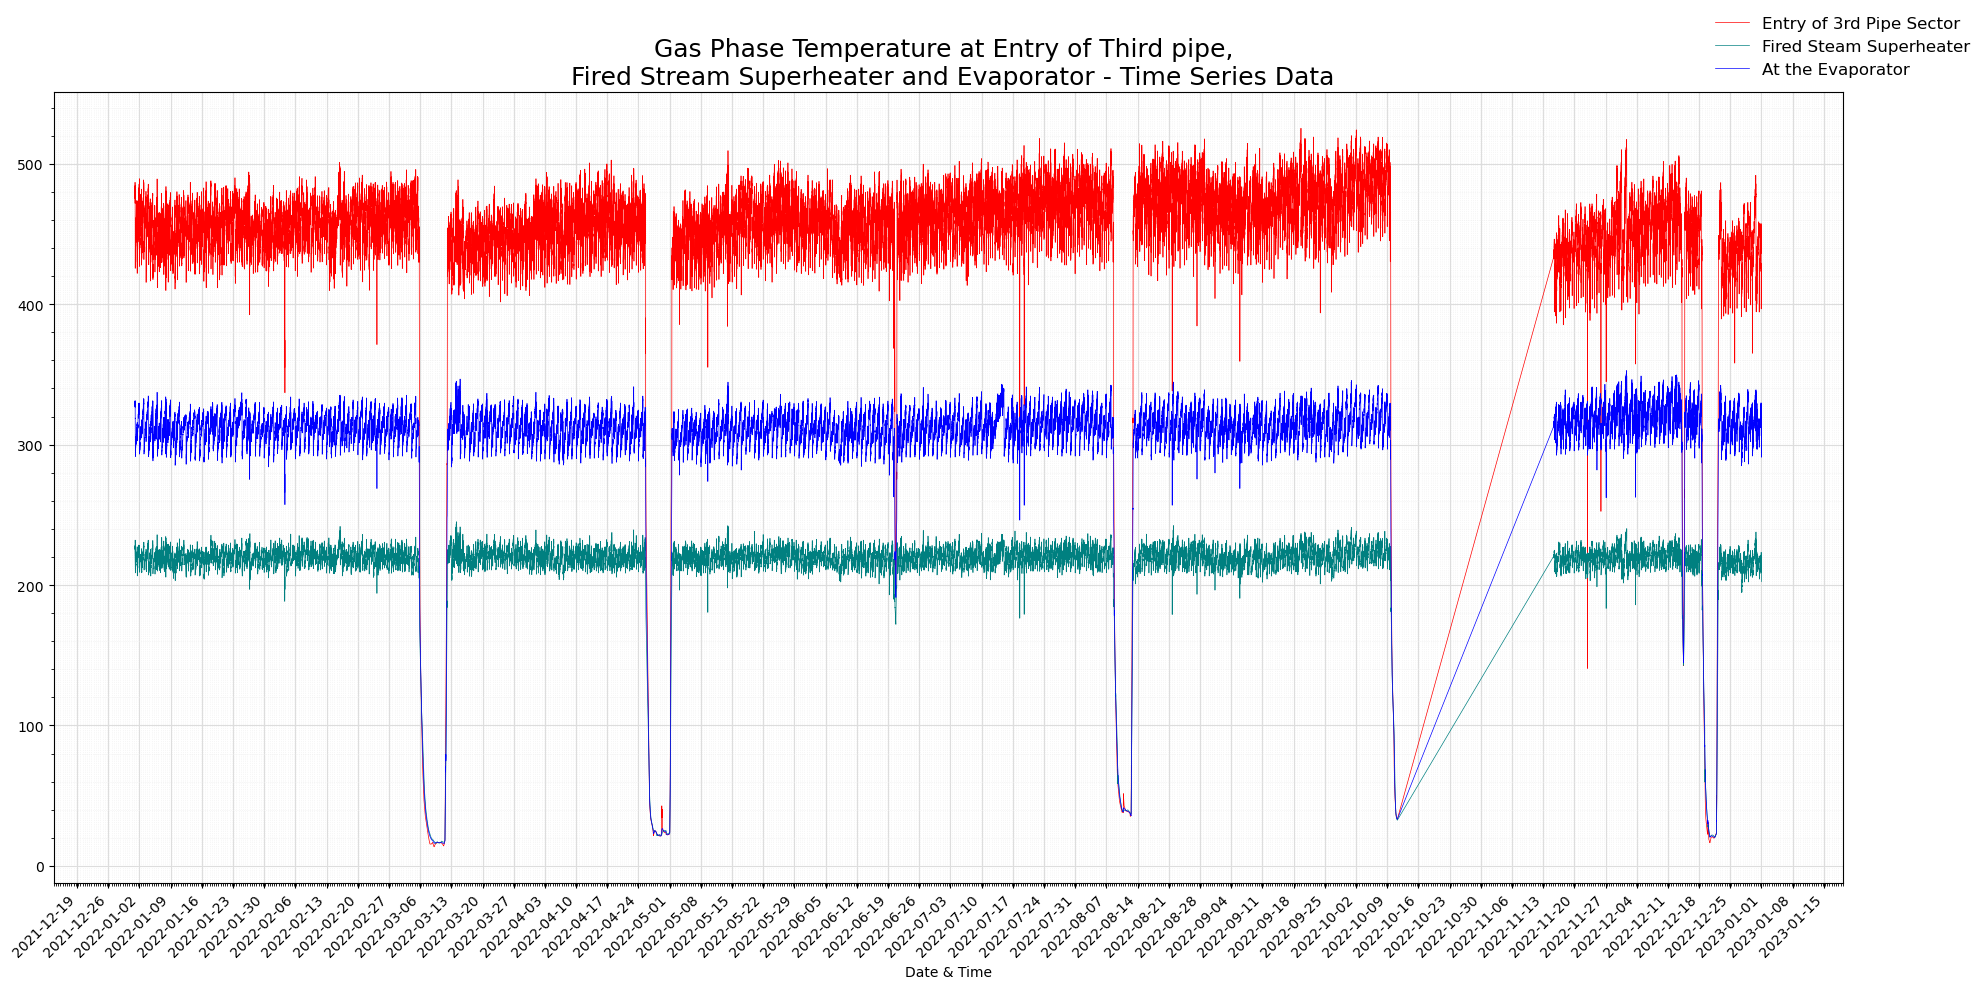

In [15]:
# Visualisation of Selected 3 pipes (Entry of 3rd Pipe Sector, Fired Steam Superheater, At the Evaporator) over 1 year
# Over a year - Visualise gas phase temperature at the Entry of 3rd pipe, Fired stream superheater and Evaporator on one graph

plt.figure(figsize=(20,10))

plt.plot(data['HAH10CT550'], label='Entry of 3rd Pipe Sector', color='red',  linewidth=0.5)
plt.plot(data['HNA10CT551'], label='Fired Steam Superheater', color='teal',  linewidth=0.5)
plt.plot(data['HAD10CT549'], label='At the Evaporator', color='blue',  linewidth=0.5)

# add grid lines 
plt.grid(which='major', color='#DDDDDD', linewidth=0.8)  # Show the minor grid as well. Style it in very light grey as a thin, # dotted line.
plt.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
# Make the minor ticks and gridlines show.
plt.minorticks_on()

# Format x-axis (for date data)
# plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())  # Auto locate major date ticks
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format the date as 'Year-Month-Day'
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7))  # Set major ticks (daily, can adjust interval)
plt.gca().xaxis.set_minor_locator(mdates.HourLocator(interval=12))  # Set minor ticks every 6 hours


plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels to avoid overlap
plt.xlabel('Date & Time')


# Add a title to the chart
plt.title('Gas Phase Temperature at Entry of Third pipe, \n Fired Stream Superheater and Evaporator - Time Series Data', fontsize=18)

# Adjust legend position and avoid overlap
plt.legend(loc='lower center', bbox_to_anchor=(1, 1), ncol=1, fontsize=12, frameon=False)

# Tighten the layout to avoid label/title overlap
plt.tight_layout()
plt.savefig('GasPhaseTemperature_Three_Time Series Data.jpeg') # shoudl go before plt.show()

plt.show()


# what needs to be done to the electricity dataset using the hour create a time within the  date and use that to merge both datasets on the equililvant 

#### From looking at this information, there is a massive drop on lines, approximately multiple occasions 5.  There is another one, but it seems that there may have been an issue/problem in November.

#### Now need to process the data using  

In [16]:
# # Now reorder the data into:
all_data = all_data [['HAH10CT550', 'HAD10CT549', 'HNA10CT551', 'HYA10DT107',
                      'HAD10CP535', 'LBA10CT546', 'HLA10CF920','HCB10DP534', 
                      'HCB10AA111', '€_per_day']]
#remove 'HCB10AA111'
# *****************************************************************************************************
#removed 'HCB10AA111' to reduce the variable as it is not necessary later.
### Drop the True and False column and the price for current data.
# d_data

In [17]:
# Define features and target make a variable 'Avg_Temp'
focus_elements = ['HAH10CT550', 'HAD10CT549', 'HNA10CT551']
d_data['Avg_Temp'] = (d_data['HAH10CT550'] + d_data['HAD10CT549'] + d_data['HNA10CT551']) / 3
d_data['Dif_Entry_and_Exit'] = d_data['HYA10DT107'] - d_data['HNA10CT551'] # need to look at this later
d_data.to_csv('all_data_with_price.csv')
# d_data.count()

d_data = d_data.loc[d_data['HCB10AA111'] != True]
d_data.drop('HCB10AA111', axis='columns')

# # Drop rows with NaN values created by the shift
d_data['Avg_Temp_60_min_Future'] = d_data['Avg_Temp'].shift(-60)
d_data.dropna(subset=['Avg_Temp_60_min_Future'], inplace=True)


/var/folders/h2/8h3kx3b906z7vcyh_js1ll840000gn/T/ipykernel_7639/492132975.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_data['Avg_Temp_60_min_Future'] = d_data['Avg_Temp'].shift(-60)
/var/folders/h2/8h3kx3b906z7vcyh_js1ll840000gn/T/ipykernel_7639/492132975.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_data.dropna(subset=['Avg_Temp_60_min_Future'], inplace=True)


In [18]:
# Reorder and tidy the data
d_data = d_data[['Date_Time', 'HAH10CT550', 'HAD10CT549', 'HNA10CT551', 'HYA10DT107',
             'HAD10CP535', 'LBA10CT546','HLA10CF920', 'HCB10DP534', 
            'Avg_Temp','Dif_Entry_and_Exit', 'Avg_Temp_60_min_Future']]
# d_data

## Algorithms carried out on the data
Initially the Gradient Boosting Regression,  XGBoost Regression, then followed by XGBoost Regression with Lag and finally, the Linear Regression. 

## Gradient Boosting Regression.

In [19]:
# Shift the target column (Sensor_Mean) by 60 minutes (assuming data is at regular time intervals)
d_data['Avg_Temp_60_min_Future'] = d_data['Avg_Temp'].shift(-60)


In [20]:
# # # Features and target
X = d_data[['HYA10DT107', 'HAH10CT550', 'HAD10CT549', 'HNA10CT551', 'HAD10CP535', 'LBA10CT546', 'HLA10CF920']]
# include_elements]  # Features: all other 6 elements
y = d_data['Avg_Temp_60_min_Future']  # Target: average of focus elements

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [21]:
# Gradient Boosting Regression - Model and results

# # Initialise and train the Gradient Boosting Regressor
modelGBR = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=False)
                                  # random_state=42) # <-This is the same as random_state)
modelGBR.fit(X_train, y_train)

# Make predictions on test data 
y_pred = modelGBR.predict(X_test)


In [22]:
d_data

,Date_Time,HAH10CT550,HAD10CT549,HNA10CT551,HYA10DT107,HAD10CP535,LBA10CT546,HLA10CF920,HCB10DP534,Avg_Temp,Dif_Entry_and_Exit,Avg_Temp_60_min_Future
0,2022-01-01 00:00:00,482.541199,328.940094,225.565659,771.282776,42.006115,406.203857,22611.878906,0.034722,345.682317,545.717117,343.154577
1,2022-01-01 00:01:00,479.932587,328.383545,226.144592,764.699646,41.990452,404.294220,22730.658203,0.034722,344.820241,538.555054,342.383759
2,2022-01-01 00:02:00,477.442352,328.381042,226.723526,763.818176,41.974785,402.192810,21774.263672,0.034722,344.182307,537.094650,341.612940
3,2022-01-01 00:03:00,478.810669,328.521057,226.906769,766.534485,41.959118,402.651550,20913.945312,0.034722,344.746165,539.627716,341.566477
4,2022-01-01 00:04:00,480.179016,328.661041,226.736908,769.787903,41.943455,403.764618,20137.824219,0.034722,345.192322,543.050995,342.245580
...,...,...,...,...,...,...,...,...,...,...,...,...
525526,2022-12-31 21:54:00,453.046112,326.943146,219.970642,746.679810,41.625919,405.127136,16069.944336,0.017361,333.319967,526.709167,NaN
525527,2022-12-31 21:55:00,452.771729,326.597534,219.537033,746.621765,41.634342,405.169708,17100.751953,0.017361,332.968765,527.084732,NaN
525528,2022-12-31 21:56:00,452.497345,326.685242,219.620529,746.327454,41.642761,404.873718,17296.533203,0.017361,332.934372,526.706924,NaN
525529,2022-12-31 21:57:00,452.222931,326.772919,219.704025,746.033203,41.651184,404.577728,16952.974609,0.017361,332.899958,526.329178,NaN


In [40]:
# Gradient Boosting Regression - Results of the modelGBR - showing both MSE & RMSE
mse = mean_squared_error(y_test, y_pred)


In [41]:
print(f'Gradient Boosting Regression - Mean Squared Error: {mse}')
rmse = np.sqrt(mse)
print(f'Gradient Boosting Regression - Root Mean Square Error: {rmse}\n')

Gradient Boosting Regression - Mean Squared Error: 147.6748026924925
Gradient Boosting Regression - Root Mean Square Error: 12.15215218356372



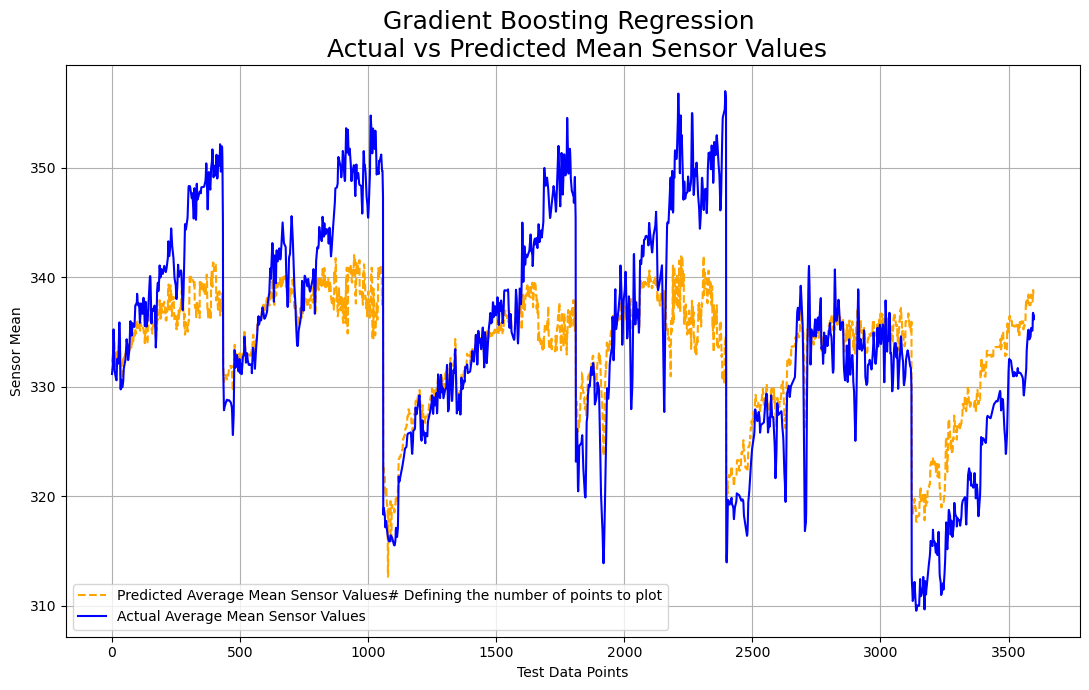

In [26]:
# Defining the number of points to plot
start_points = 720*4
end_points = start_points + 720*5

actual_current = X_test[['HAH10CT550', 'HAD10CT549', 'HNA10CT551']].mean(axis=1)  # Assuming average temperature of the current values
actual_current = actual_current.values[start_points:end_points]

# Slice the data to include only the first `num_points`
y_test_subset = y_test.values[start_points:end_points]
y_pred_subset = y_pred[start_points:end_points]



# Plot the subset of the data
plt.figure(figsize=(11, 7))
plt.plot(y_pred_subset, label='Predicted Average Mean Sensor Values# Defining the number of points to plot', color='orange', linestyle='--')
plt.plot(actual_current, label='Actual Average Mean Sensor Values', color='blue') #'#0000FF')
plt.xlabel('Test Data Points')
plt.ylabel('Sensor Mean')
plt.title('Gradient Boosting Regression \n Actual vs Predicted Mean Sensor Values', fontsize=18)
plt.grid()


# Tighten the layout to avoid label/title overlap
plt.tight_layout()
plt.legend()
plt.show()

## XGBOOST with Regression.

In [29]:
# %pip install xgboost #or to have it all the time use !pip install xgboost
# !pip install xgboost

In [30]:
from xgboost import XGBRegressor

d_data['Avg_Temp_60_min_Future'] = d_data['Avg_Temp'].shift(-60)

# Drop rows with NaN values created by the shift
d_data.dropna(subset=['Avg_Temp_60_min_Future'], inplace=True)


In [31]:
# Define features (current data) and target (temperature 60 minutes ahead)
# X data is all the variables within the data frame and y will be using the calculated average temperature of the three variables
X = d_data[['HAH10CT550', 'HAD10CT549', 'HNA10CT551', 'HYA10DT107', 'HAD10CP535', 'LBA10CT546', 'HLA10CF920', 'HCB10DP534']]
y = d_data['Avg_Temp_60_min_Future']

# Split the data (no shuffling for time series, setting the data to 80% training and test data to 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [32]:
# Initialise and train the XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)


In [33]:
# Calculate both the MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'XGBoost with Regression - Mean Squared Error (MSE): {mse}')
print(f'XGBoost with Regression - Root Mean Squared Error (RMSE): {rmse}')

XGBoost with Regression - Mean Squared Error (MSE): 167.7174951585243
XGBoost with Regression - Root Mean Squared Error (RMSE): 12.950578950708122


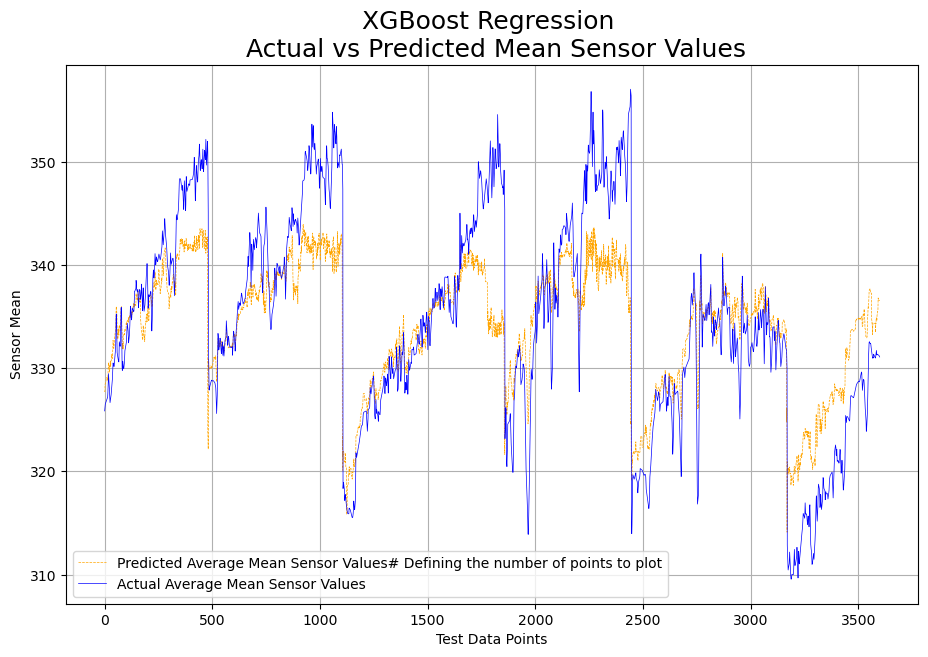

In [34]:
# Define the number of points you want to plot
start_points = 720*4
end_points = start_points + 720*5

actual_current = X_test[['HAH10CT550', 'HAD10CT549', 'HNA10CT551']].mean(axis=1)  # Assuming average temperature of the current values
actual_current = actual_current.values[start_points:end_points]


y_test_subset = y_test.values[start_points:end_points]
y_pred_subset = y_pred[start_points:end_points]

# Plot the data
plt.figure(figsize=(11,7))

plt.plot(y_pred_subset, label='Predicted Average Mean Sensor Values# Defining the number of points to plot', color='orange', linewidth=0.5, linestyle='--')
plt.plot(actual_current, label='Actual Average Mean Sensor Values', color='blue', linewidth=0.5)
# Plot actual test values for comparison
plt.xlabel('Test Data Points')
plt.ylabel('Sensor Mean')
plt.title('XGBoost Regression \n Actual vs Predicted Mean Sensor Values', fontsize=18)

# save the plot
# plt.savefig('XGBoost_Regression.png')
plt.savefig('results_images/XGBoost_Regression.jpeg')

# Show the plot
plt.grid()
plt.legend()
plt.show()

## XGBoost Regression with Lag

In [35]:
# Assuming 'merged_data' contains the relevant sensor data and timestamps
d_data = d_data.copy()

# Create lag features for each sensor column (from 1 to 60 minutes ago)
for lag in range(1, 60):
    d_data[f'HYA10DT107_lag{lag}'] = d_data['HYA10DT107'].shift(lag)
    d_data[f'HAH10CT550_lag{lag}'] = d_data['HAH10CT550'].shift(lag)
    d_data[f'HAD10CT549_lag{lag}'] = d_data['HAD10CT549'].shift(lag)
    d_data[f'HNA10CT551_lag{lag}'] = d_data['HNA10CT551'].shift(lag)
    d_data[f'HAD10CP535_lag{lag}'] = d_data['HAD10CP535'].shift(lag)
    d_data[f'LBA10CT546_lag{lag}'] = d_data['LBA10CT546'].shift(lag)
    d_data[f'HLA10CF920_lag{lag}'] = d_data['HLA10CF920'].shift(lag)

# Drop rows with NaN values created by the shift (first 60 rows)
d_data.dropna(inplace=True)

# Define the input features (using all 60 lags) and the target variable
lag_features = [col for col in d_data.columns if 'lag' in col]
X = d_data[['HYA10DT107', 'HAH10CT550', 'HAD10CT549', 'HNA10CT551', 'HAD10CP535', 'LBA10CT546', 'HLA10CF920'] + lag_features]
# Assuming you have the 'Average_Temperature_60min_Future' as your target
y = d_data['Avg_Temp_60_min_Future']  # Make sure this column exists



/var/folders/h2/8h3kx3b906z7vcyh_js1ll840000gn/T/ipykernel_7639/2916737907.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d_data[f'HYA10DT107_lag{lag}'] = d_data['HYA10DT107'].shift(lag)
/var/folders/h2/8h3kx3b906z7vcyh_js1ll840000gn/T/ipykernel_7639/2916737907.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d_data[f'HAH10CT550_lag{lag}'] = d_data['HAH10CT550'].shift(lag)
/var/folders/h2/8h3kx3b906z7vcyh_js1ll840000gn/T/ipykernel_7639/2916737907.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually 

In [36]:
# XGBoost for model training
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Convert to DMatrix, the format XGBoost uses for efficient computation
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Train XGBoost with default parameters (you can tune them later)
params = {
    'objective': 'reg:squarederror',  # for regression
    'max_depth': 6,
    'eta': 0.1,
    'subsample': 0.8
}

# Train the model
model = xgb.train(params, dtrain, num_boost_round=100)

# Predict on the test set
y_pred = model.predict(dtest)


XGBoost Regression with Lag
Mean Squared Error: 175.03674101960817
RMSE: 13.230145162454122


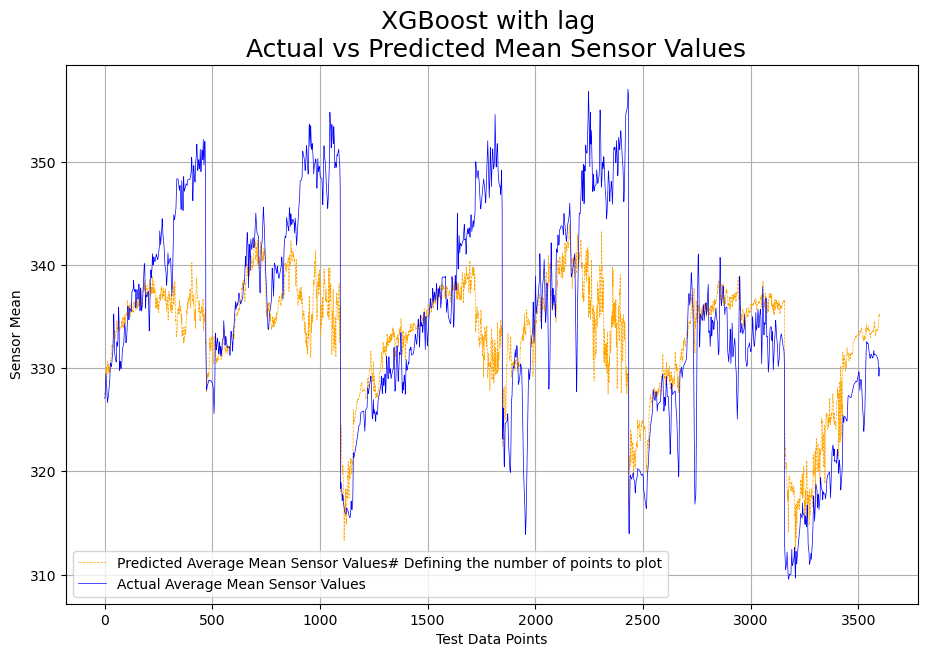

In [37]:
# Evaluate the performance
print(f'XGBoost Regression with Lag')
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')


# Define the number of points you want to plot
start_points = 720*4
end_points = start_points + 720*5

actual_current = X_test[['HAH10CT550', 'HAD10CT549', 'HNA10CT551']].mean(axis=1)  # Assuming average temperature of the current values
actual_current = actual_current.values[start_points:end_points]
# Slice the data to include only the first `num_points`
y_test_subset = y_test.values[start_points:end_points]
y_pred_subset = y_pred[start_points:end_points]
#y_test_subset = y_test_merged_data[start_points:end_points]

#print(y_pred_subset)
# Plot the data
plt.figure(figsize=(11,7))

plt.plot(y_pred_subset, label='Predicted Average Mean Sensor Values# Defining the number of points to plot', color='orange',linewidth=0.5, linestyle='--')
plt.plot(actual_current, label='Actual Average Mean Sensor Values', color='blue', linewidth=0.5)
plt.xlabel('Test Data Points')
plt.ylabel('Sensor Mean')
plt.title('XGBoost with lag \n Actual vs Predicted Mean Sensor Values', fontsize=18)
# save the plot
# plt.savefig('XGBoost_w_Lag.png')
plt.savefig('results_images/XGBoost_w_Lag.jpeg')

# Show the plot
plt.grid()
plt.legend()
plt.show()

## Linear Regression 

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# Checking if these need to be kept
# # Creating the future temperature column (60 minutes ahead)
# d_data['Avg_Temp_60_min_Future'] = d_data['Avg_Temp'].shift(-60)

# # Drop rows with NaN values created by the shift
# d_data.dropna(subset=['Avg_Temp_60_min_Future'], inplace=True)

# # Define features (current data) and target (temperature 60 minutes ahead)
# X = d_data[['HAH10CT550', 'HAD10CT549', 'HNA10CT551', 'HYA10DT107', 'HAD10CP535', 'LBA10CT546', 'HLA10CF920', 'HCB10DP534']]
# y = d_data['Avg_Temp_60_min_Future']

# Split the data (without shuffling for time series, setting the test data to 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialise and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)


Linear Regression 
Mean Squared Error (MSE): 147.6748026924925
Root Mean Squared Error (RMSE): 12.15215218356372


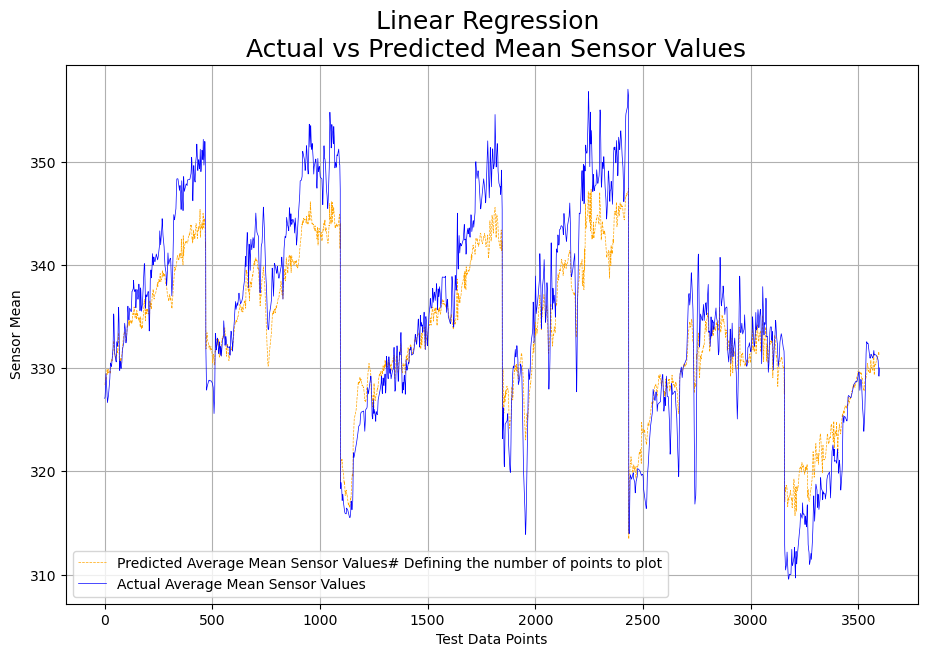

In [39]:
# Calculate both the MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Linear Regression \nMean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Define the number of points to plot
start_points = 720*4
end_points = start_points + 720*5

# Get the actual mean from the sensors (averaging three specific sensors)
actual_current = X_test[['HAH10CT550', 'HAD10CT549', 'HNA10CT551']].mean(axis=1)
actual_current = actual_current.values[start_points:end_points]

# Slice the data for plotting
y_test_subset = y_test.values[start_points:end_points]
y_pred_subset = y_pred[start_points:end_points]

# Plot the data
plt.figure(figsize=(11,7))
plt.plot(y_pred_subset, label='Predicted Average Mean Sensor Values# Defining the number of points to plot', color='orange', linewidth=0.5, linestyle='--')
plt.plot(actual_current, label='Actual Average Mean Sensor Values', color='blue', linewidth=0.5)
plt.xlabel('Test Data Points')
plt.ylabel('Sensor Mean')
plt.title('Linear Regression \n Actual vs Predicted Mean Sensor Values', fontsize=18)
# save the plot
# plt.savefig('Linear_Regression.png')
plt.savefig('results_images/Linear_Regression.jpeg')

# Show the plot
plt.grid()
plt.legend()
plt.show()